In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [3]:
df = pd.read_csv("../../data/wine/winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

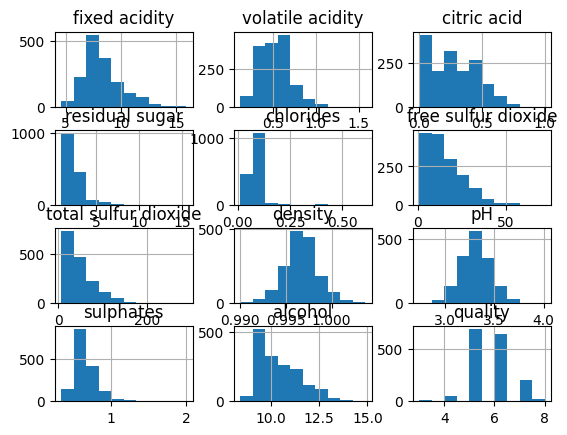

In [5]:
df.hist()

몇 몇 데이터는 log화를 시켜주는 것이 좋을 것 같다

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

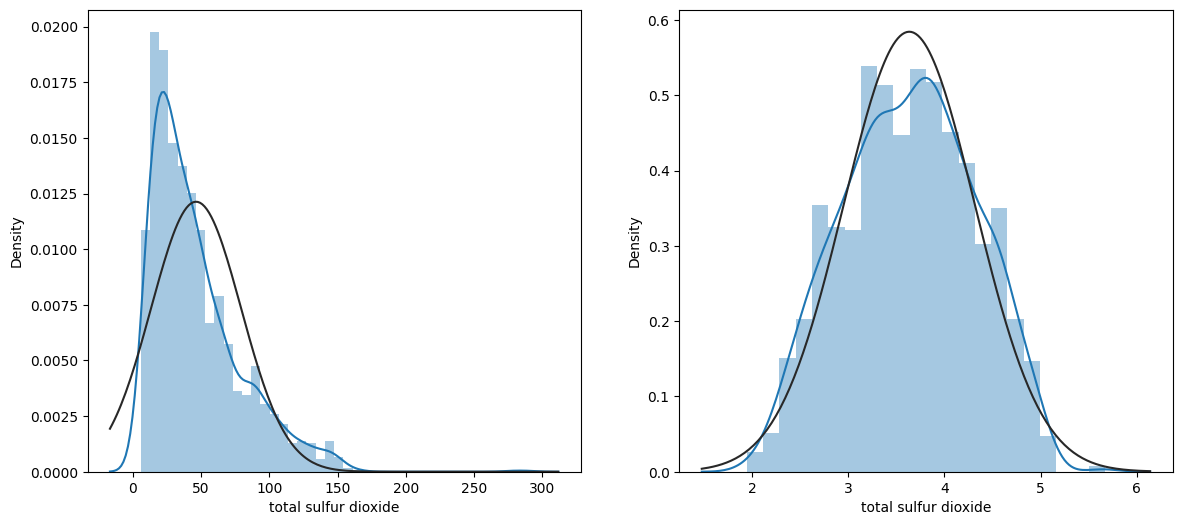

In [6]:
from scipy.stats import norm
import warnings
warnings.simplefilter("ignore")

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(df['total sulfur dioxide'], fit=norm, ax=ax1)
sns.distplot(np.log(df['total sulfur dioxide']+1), fit=norm, ax=ax2)

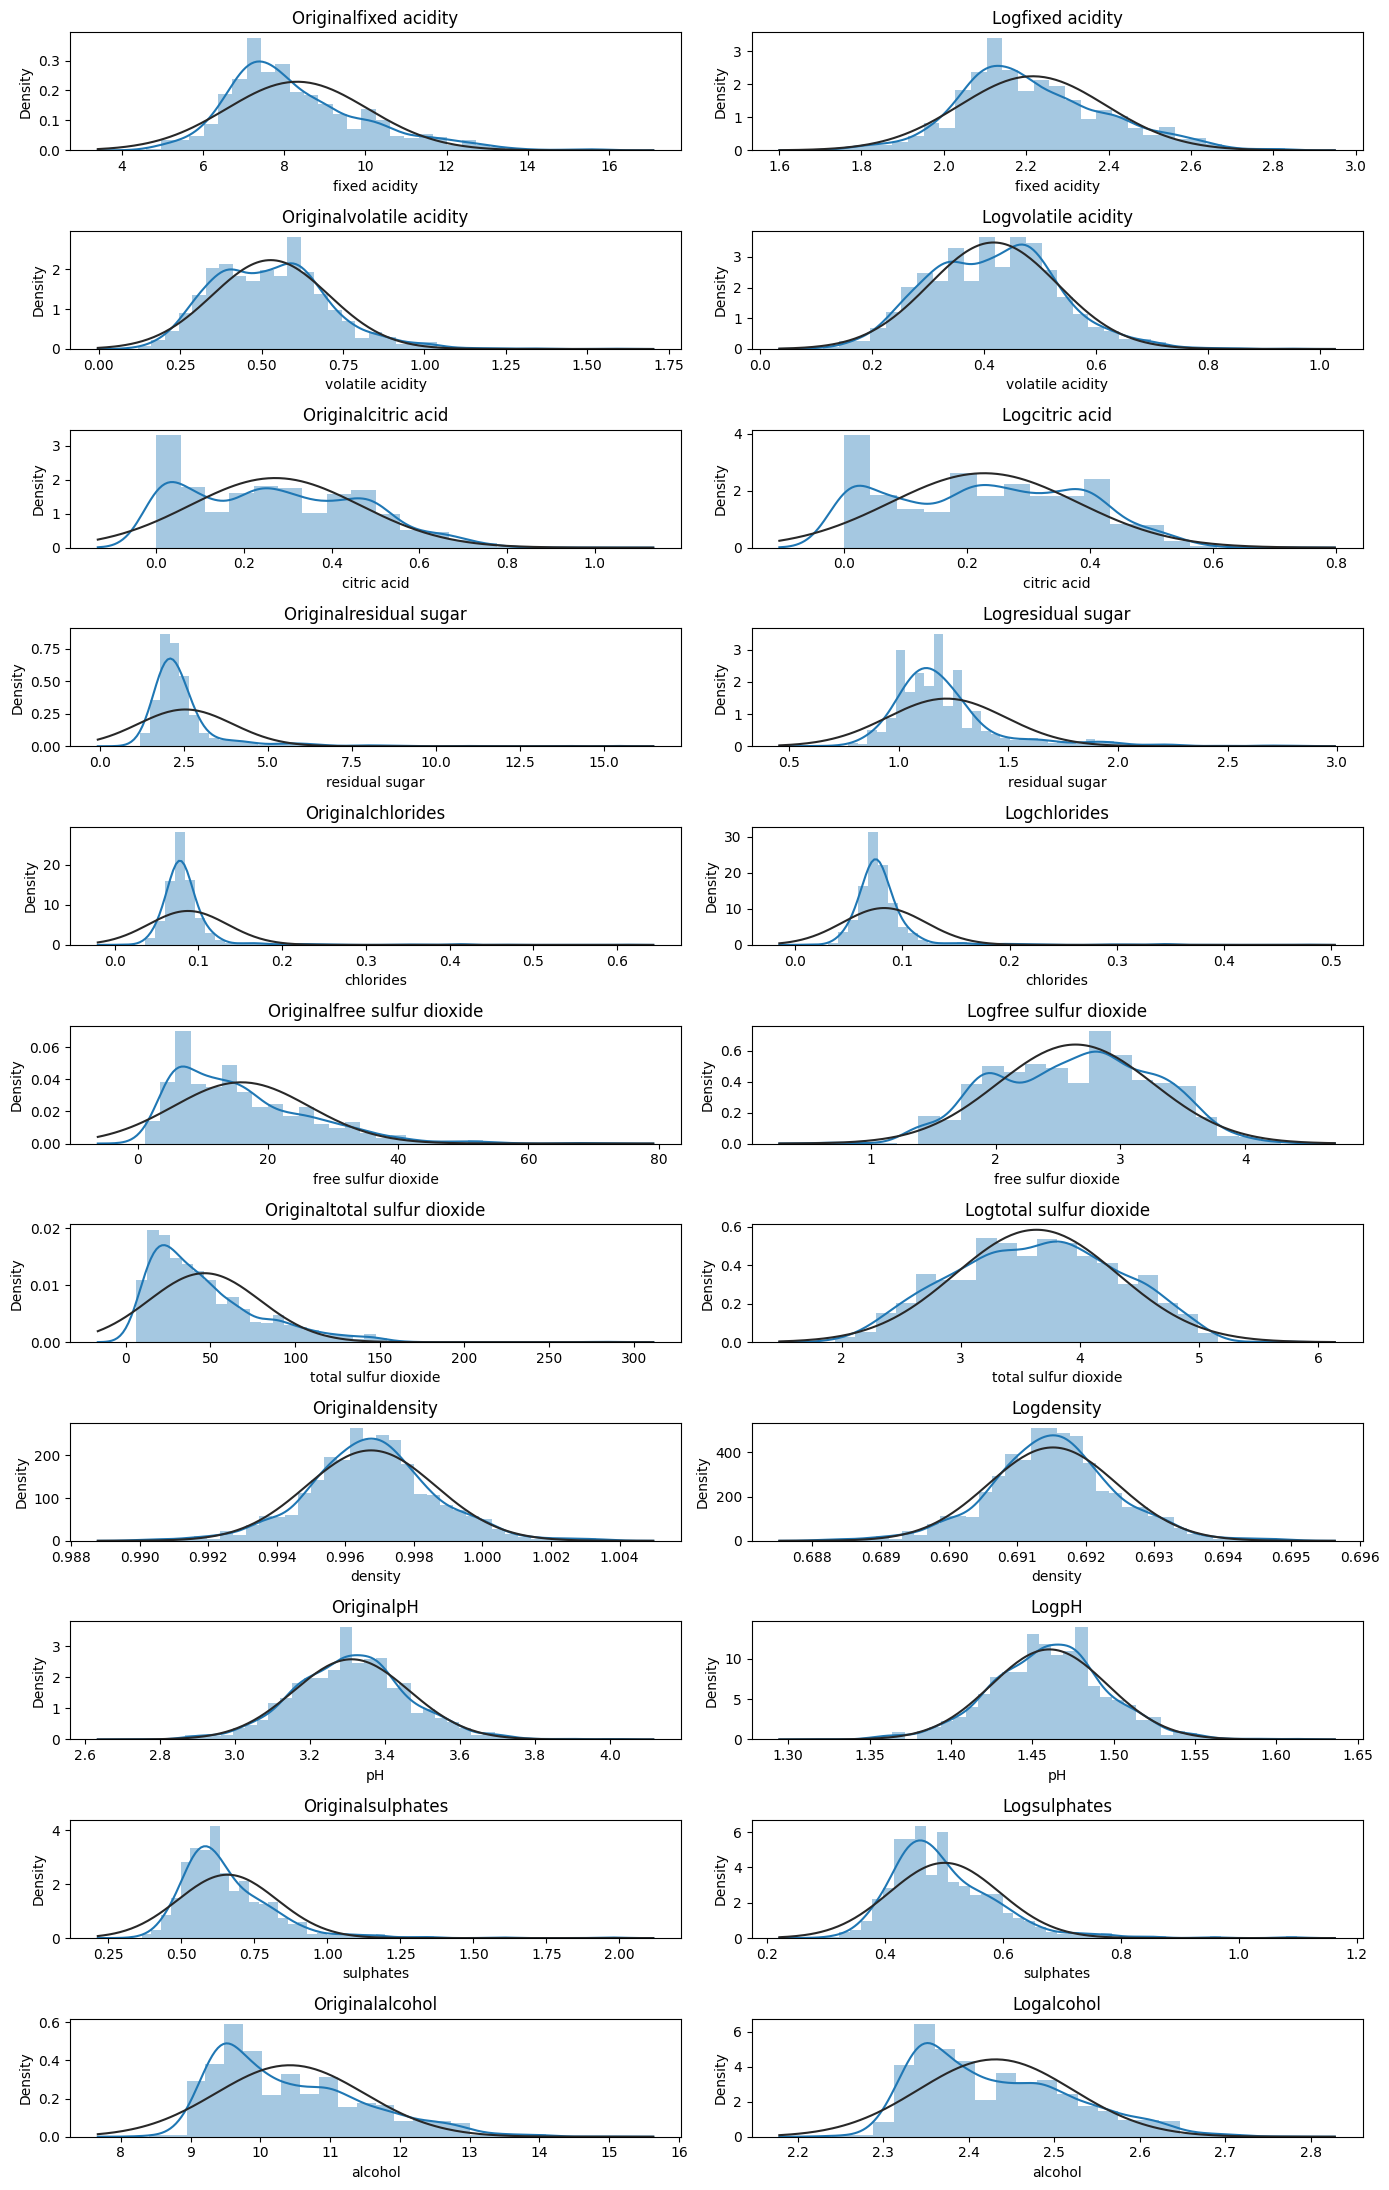

In [7]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']

figure, axes = plt.subplots(nrows=len(features), ncols=2)
figure.set_size_inches(14, 2 * len(features))

for i, feature in enumerate(features):
    sns.distplot(df[feature], fit=norm, ax=axes[i, 0])
    sns.distplot(np.log1p(df[feature]), fit=norm, ax=axes[i, 1])
    axes[i, 0].set_title(f'Original{feature}')
    axes[i, 1].set_title(f'Log{feature}')

plt.tight_layout()
plt.show()

## 상관관계 Quarilty기준

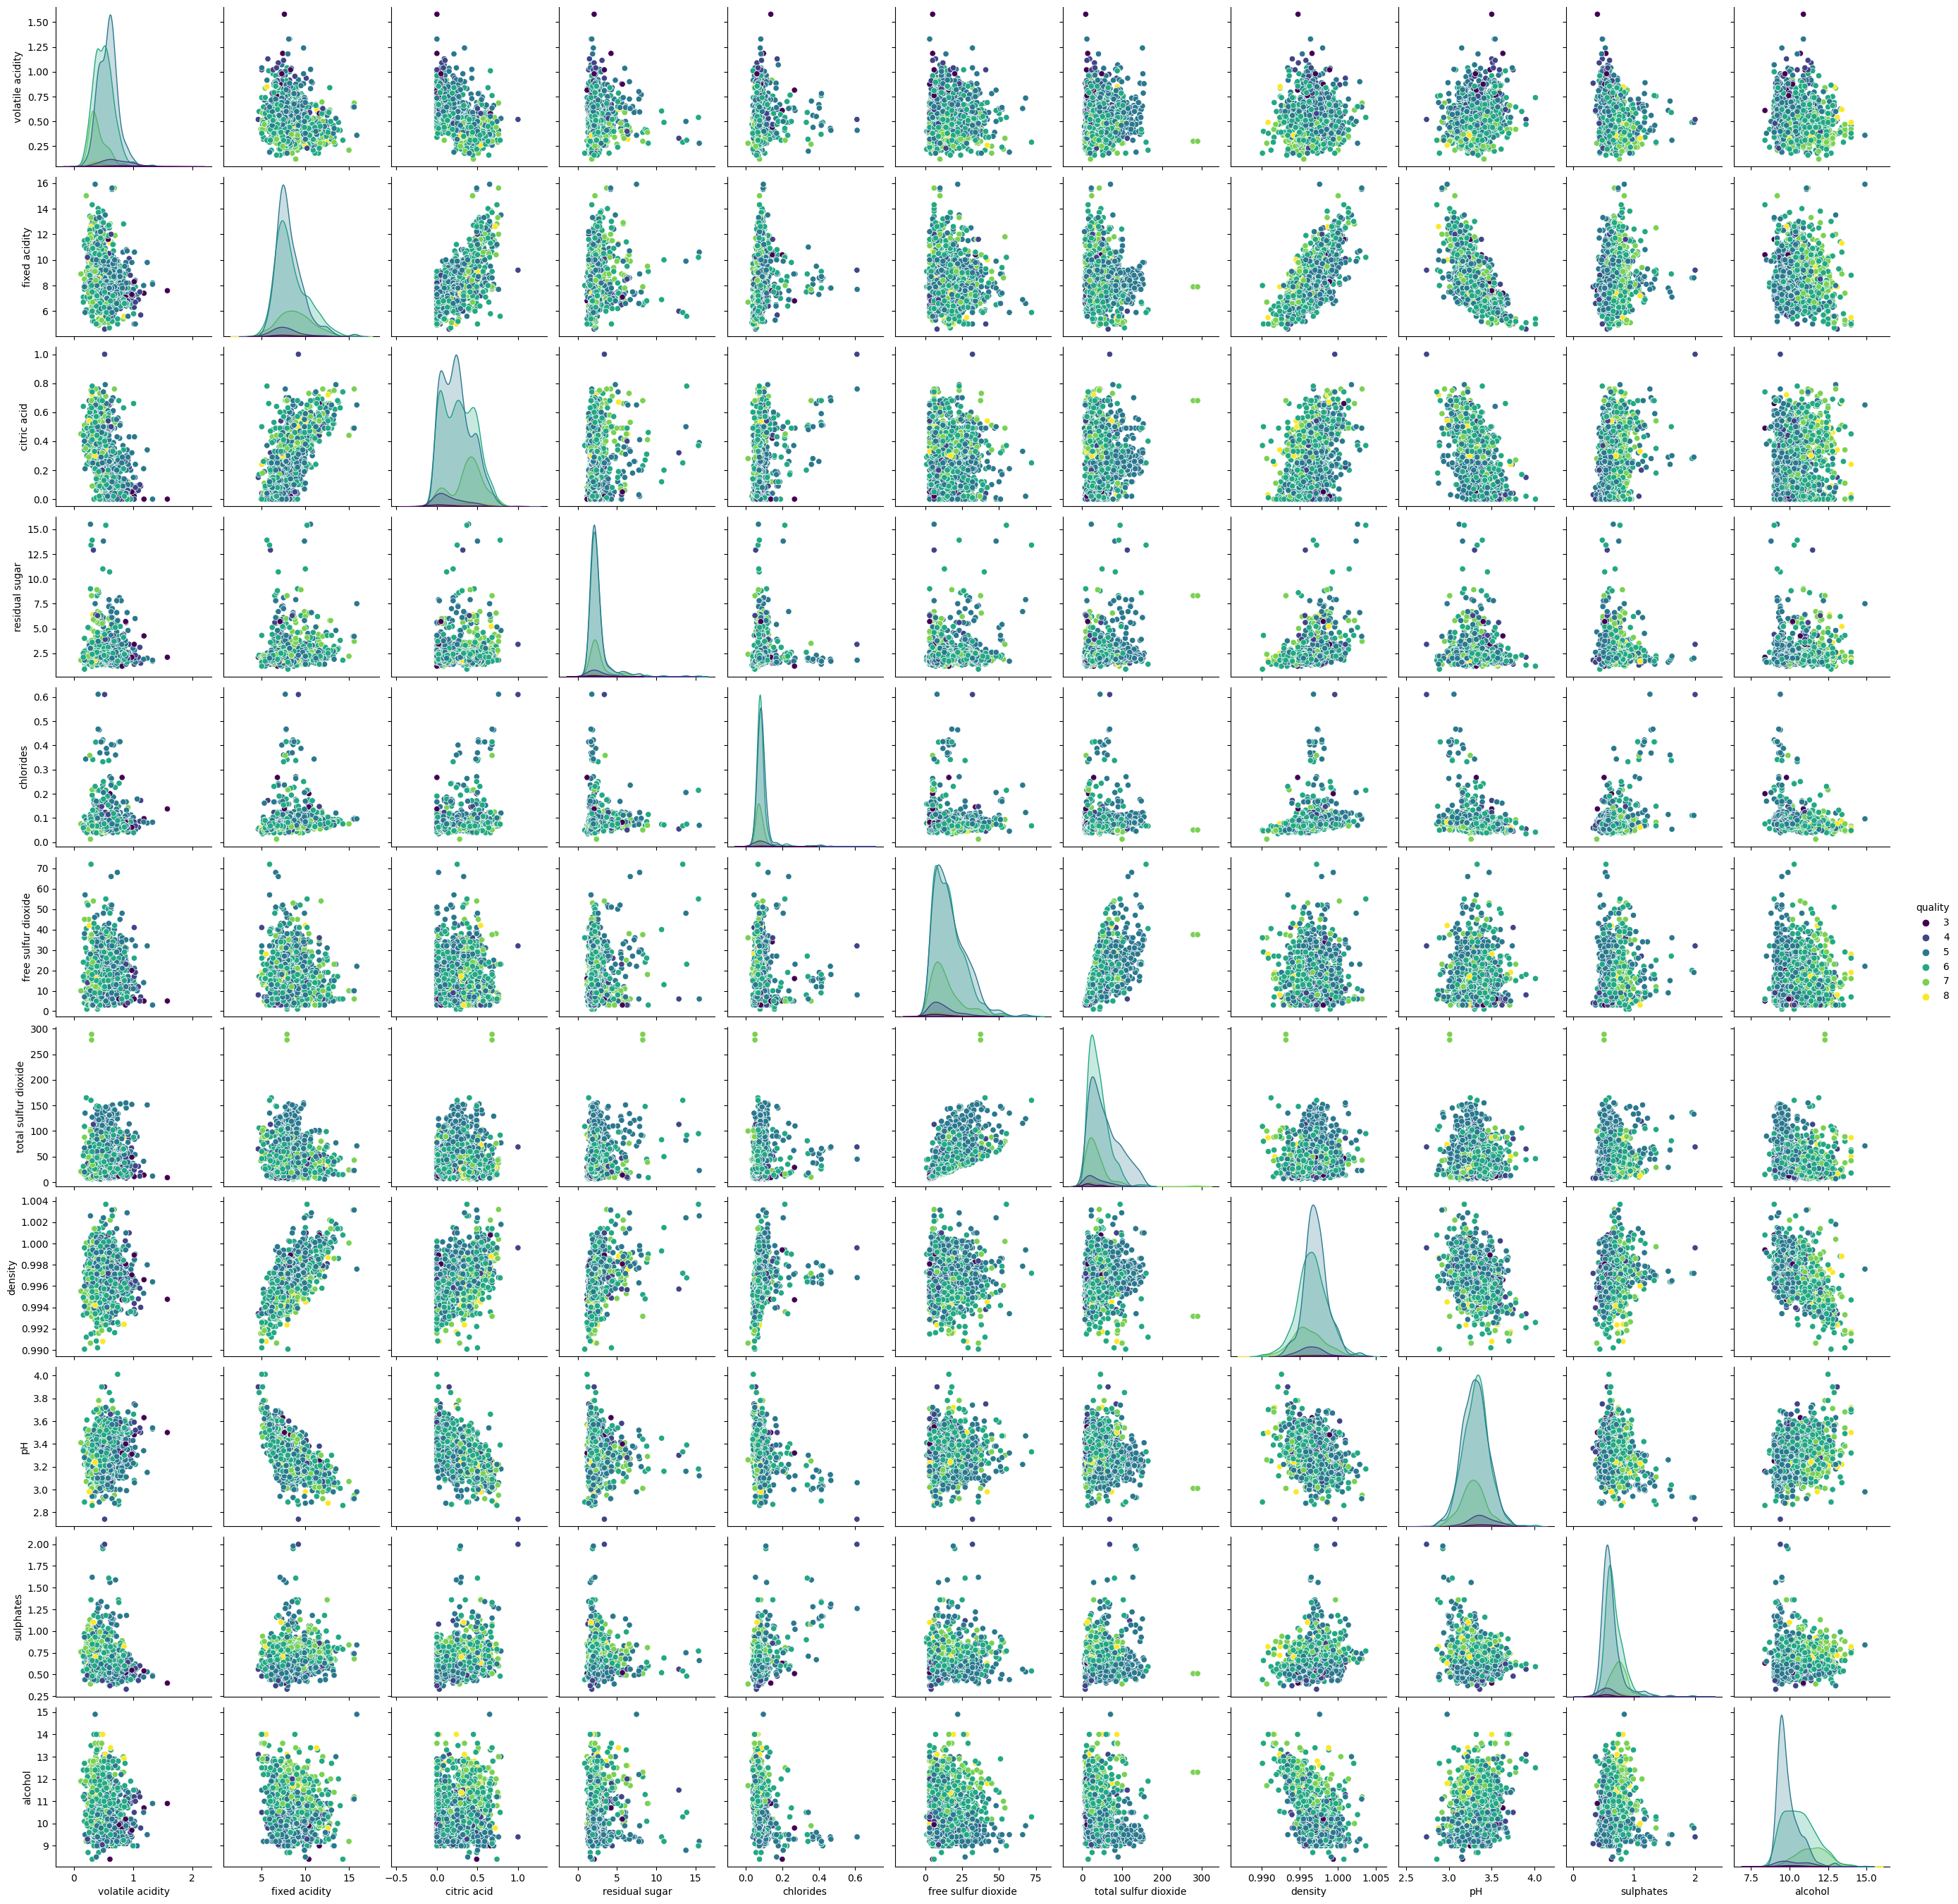

In [8]:
sns.pairplot(df, vars=['volatile acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 
                      'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
             hue='quality', palette='viridis', markers='o')
plt.show()

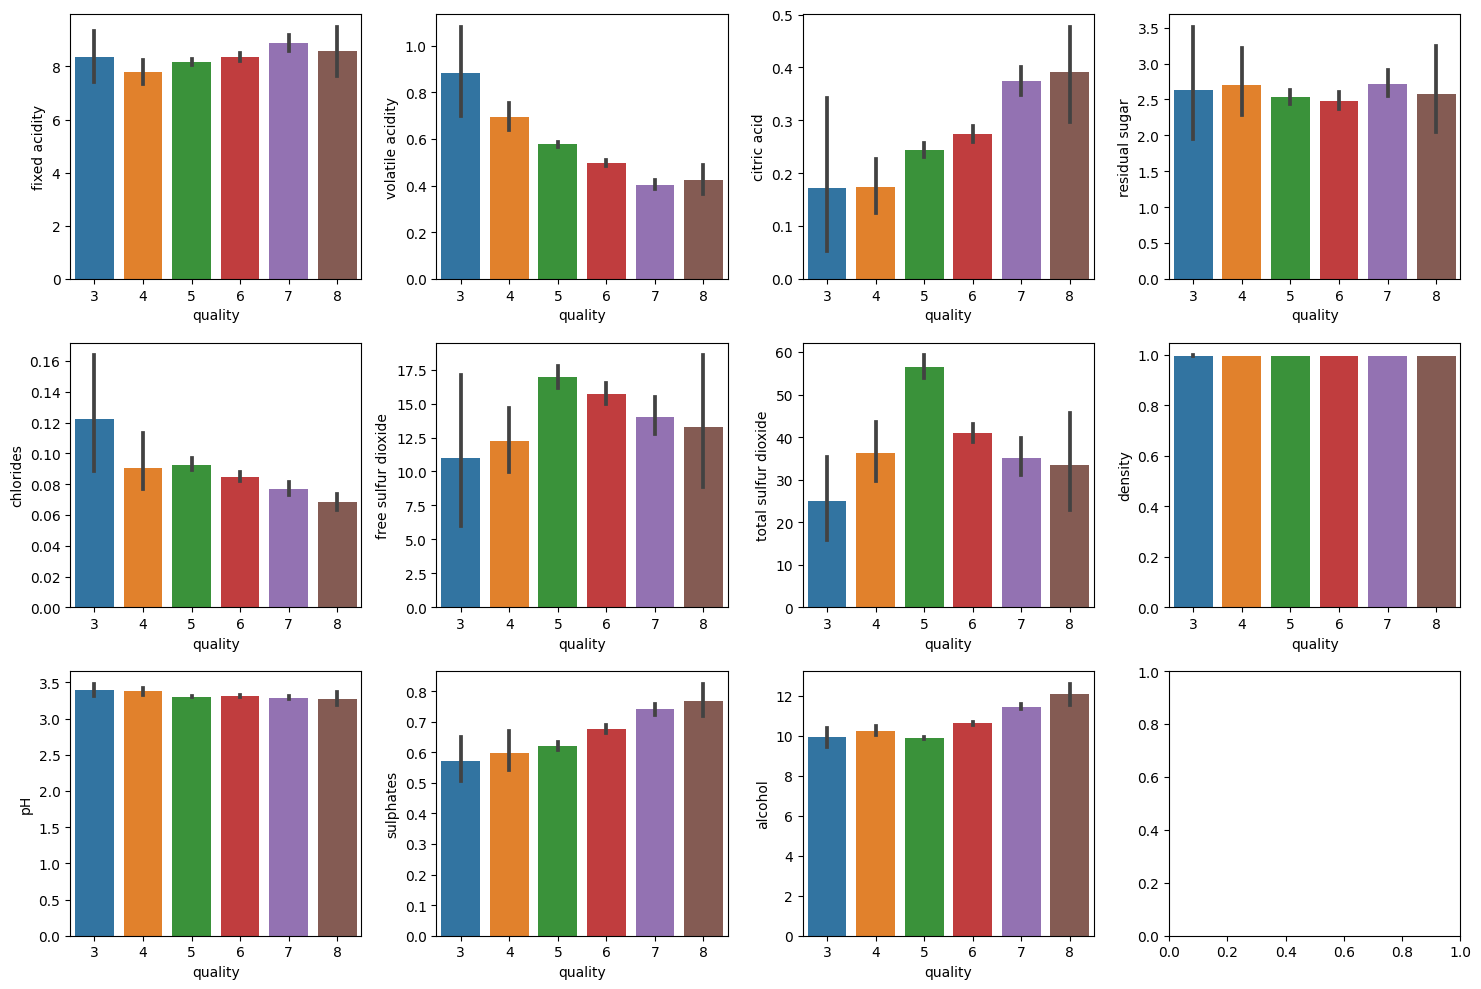

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# 품질에 따른 각 피처에 대한 막대 그래프를 그립니다.
for i, ax in enumerate(axes.flat):
    if i < len(df.columns) - 1:  # 플롯이 너무 많지 않도록
        sns.barplot(x='quality', y=df.columns[i], data=df, ax=ax)

plt.tight_layout()
plt.show()

log화를 통해 데이터의 이상치가 없어지는 것들을 확인

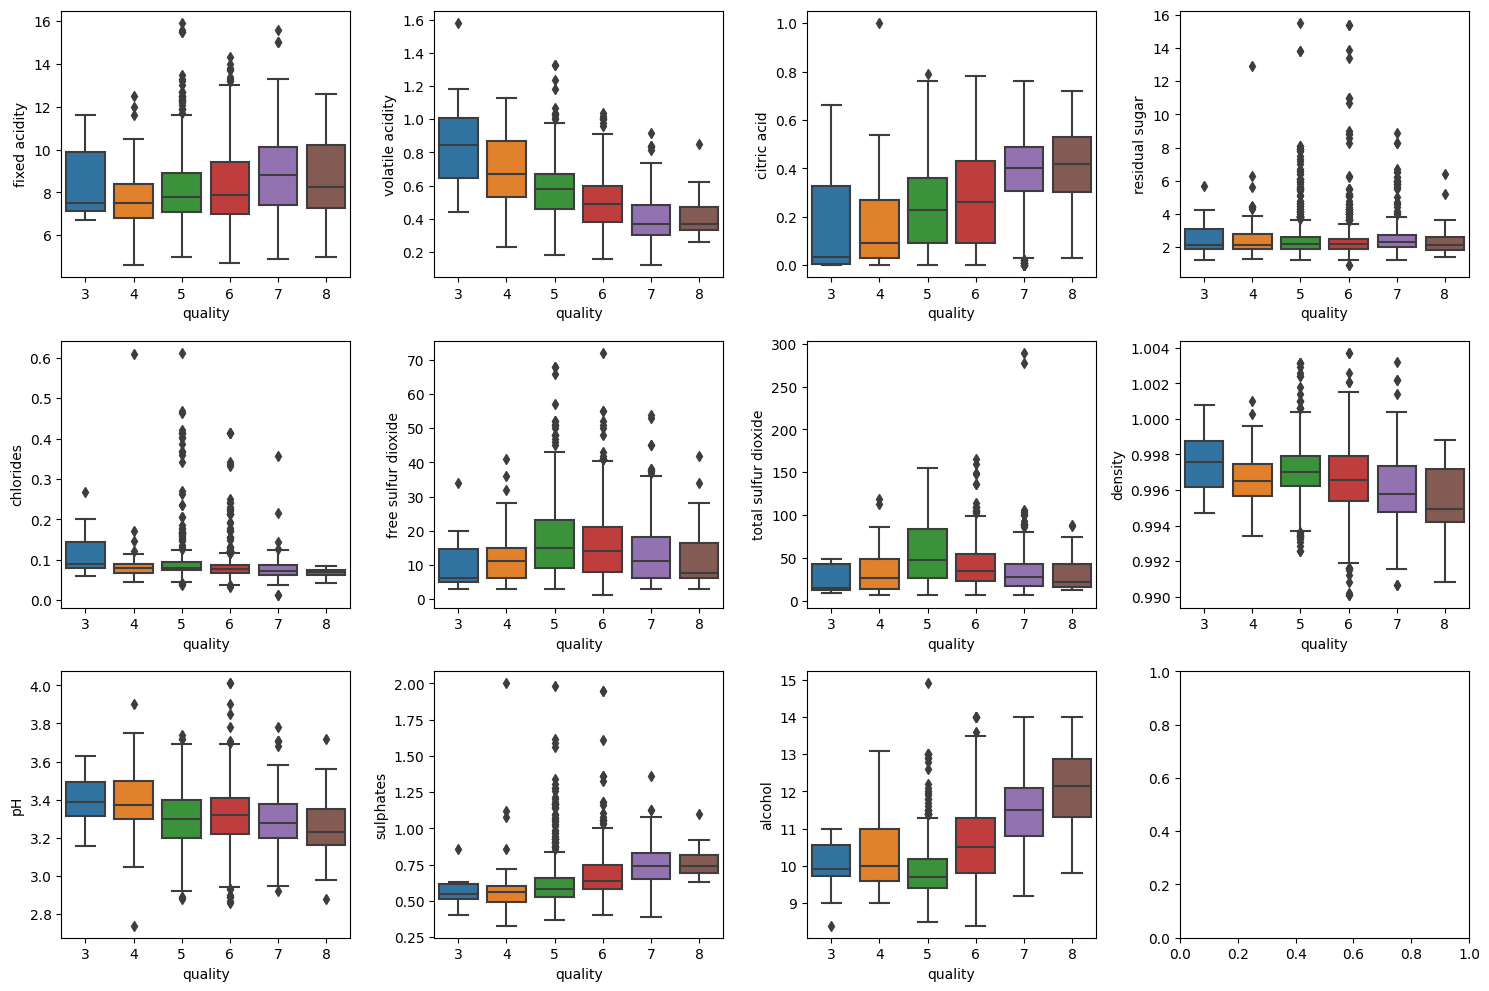

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# 품질에 따른 각 피처에 대한 막대 그래프를 그립니다.
for i, ax in enumerate(axes.flat):
    if i < len(df.columns) - 1:  # 플롯이 너무 많지 않도록
        sns.boxplot(x='quality', y=df.columns[i], data=df, ax=ax)

plt.tight_layout()
plt.show()

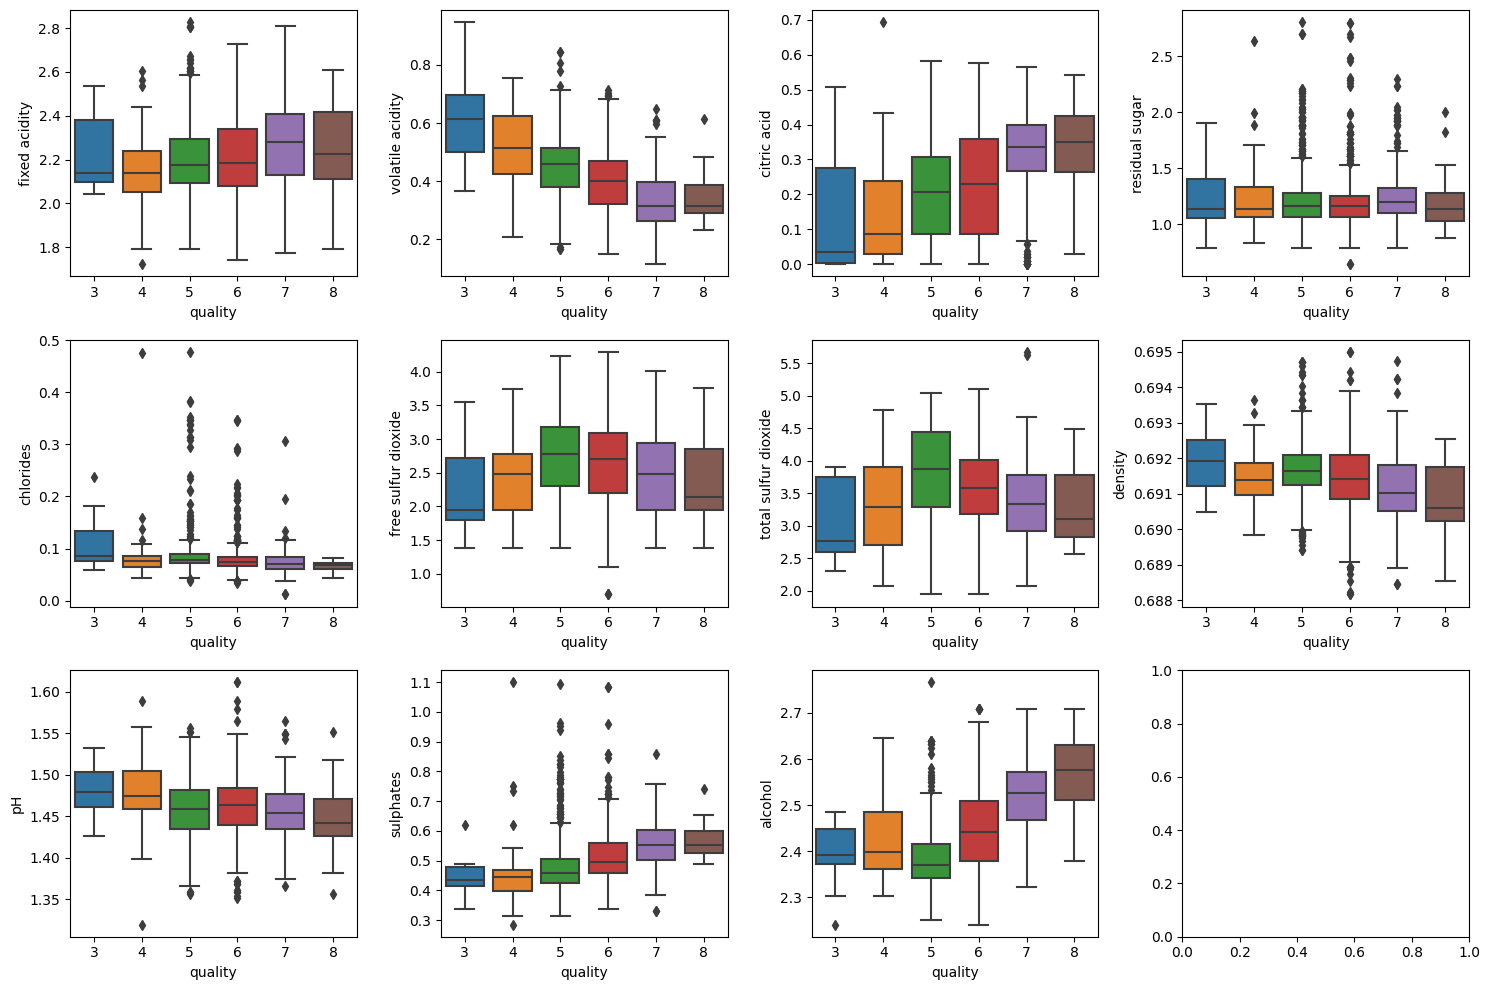

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# 품질에 따른 각 피처에 대한 상자 그림을 그립니다.
for i, ax in enumerate(axes.flat):
    if i < len(df.columns) - 1:  # 플롯이 너무 많지 않도록
        sns.boxplot(x='quality', y=np.log1p(df[df.columns[i]]), data=df, ax=ax)  # 로그 스케일 적용

plt.tight_layout()
plt.show()

standard, minmaxm robust 스케일링을해도 이상치 및 데이터 분포가 크게 바뀌지 않습니다.

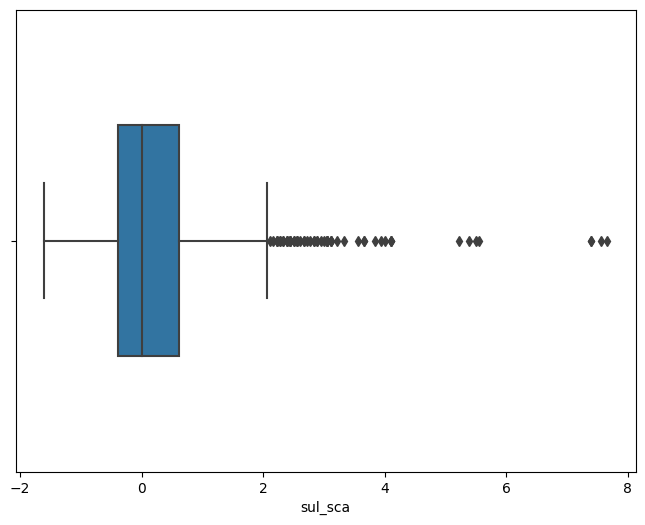

In [12]:
from sklearn.preprocessing import RobustScaler

# Min-Max 스케일러 생성
scaler = RobustScaler()

# 'sulphates' 피쳐에 대해 Min-Max 스케일링 적용
df_sca = df.copy()
df_sca['sul_sca'] = scaler.fit_transform(df_sca[['sulphates']])

# 스케일링 전과 후의 분포 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='sul_sca', data=df_sca, width=0.5)
plt.show()

데이터의 불균형이 있기 때문에 변형을 하는 것도 좋아보입니다.

Text(0.5, 1.0, 'Distribution of Quality')

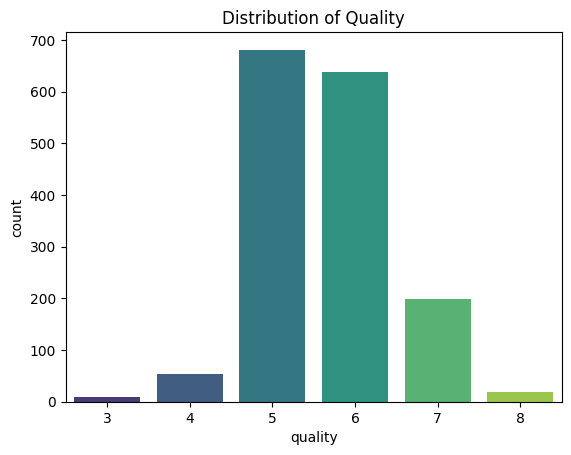

In [13]:
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Quality')

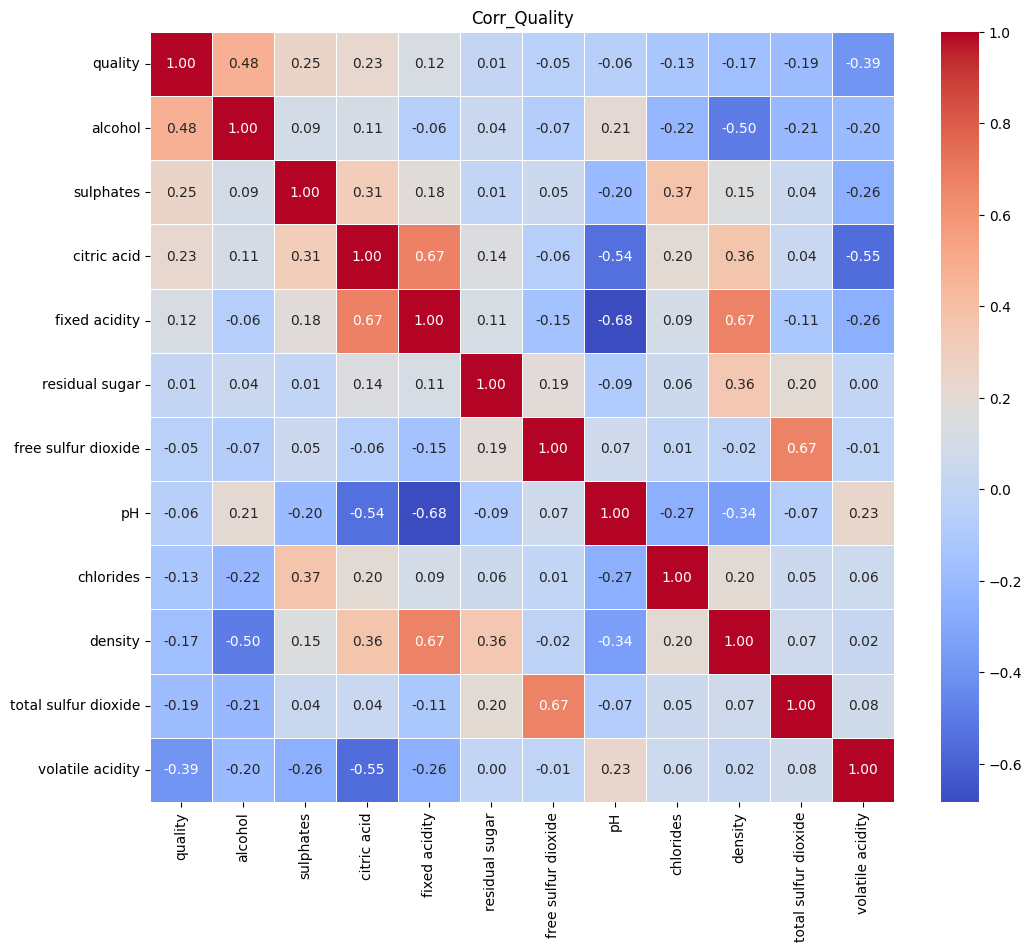

In [14]:
sort_qual = df.corr()['quality'].sort_values(ascending=False)
corr_qual = df[sort_qual.index].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_qual, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corr_Quality')
plt.show()

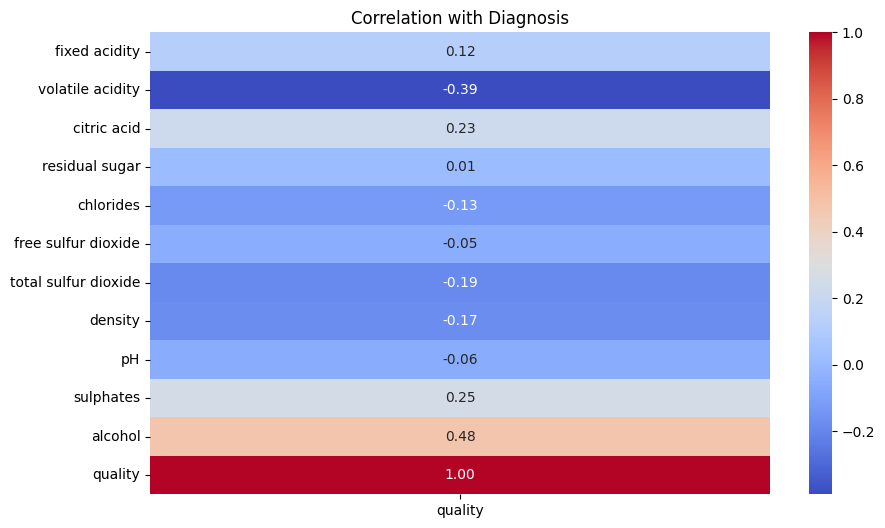

In [15]:
correlation_matrix = df.corr()
corr_qual2 = df.corr()['quality']

plt.figure(figsize=(10, 6))
sns.heatmap(corr_qual2.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Diagnosis')
plt.show()

전체적으로 데이터를 다 사용해도 될 것같다 상관계수가 낮거나 이상치가 많은 데이터도 많지만 큰 차이가 없어 보인다.

In [25]:
df_false = pd.read_csv('./data/trn_y.csv',index_col=False)
df_0 = pd.read_csv('./data/trn_y.csv',index_col=0)
df = pd.read_csv('./data/trn_y.csv')

In [26]:
df_false

Unnamed: 0  quality
0              0        5
1              1        5
2              2        6
3              3        7
4              4        4
...          ...      ...
1274        1274        5
1275        1275        6
1276        1276        5
1277        1277        5
1278        1278        7

[1279 rows x 2 columns]

In [27]:
df_0

quality
0           5
1           5
2           6
3           7
4           4
...       ...
1274        5
1275        6
1276        5
1277        5
1278        7

[1279 rows x 1 columns]

In [28]:
df

Unnamed: 0  quality
0              0        5
1              1        5
2              2        6
3              3        7
4              4        4
...          ...      ...
1274        1274        5
1275        1275        6
1276        1276        5
1277        1277        5
1278        1278        7

[1279 rows x 2 columns]